---
### Import Libraries

In [1]:
!pip install pycaret

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *

from sklearn.metrics import *
import scikitplot as skplt

df = pd.read_csv("parkinsons_combined_data.csv")

### Exploratory Data Analysis

In [2]:
df.head()

,MDVP:RAP,MDVP:Shimmer,NHR,HNR,status,RPDE,DFA
0,0.00067,0.05883,0.036223,18.995,1,0.57227,0.71826
1,0.00052,0.05516,0.017974,21.497,1,0.53966,0.69481
2,0.00057,0.09902,0.026313,17.651,1,0.58982,0.67604
3,0.00149,0.05451,0.042003,19.865,1,0.59257,0.79672
4,0.00166,0.05610,0.027139,19.557,1,0.53028,0.79782


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MDVP:RAP      350 non-null    float64
 1   MDVP:Shimmer  350 non-null    float64
 2   NHR           350 non-null    float64
 3   HNR           350 non-null    float64
 4   status        350 non-null    int64  
 5   RPDE          350 non-null    float64
 6   DFA           350 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 19.3 KB


In [4]:
df.describe()

,MDVP:RAP,MDVP:Shimmer,NHR,HNR,status,RPDE,DFA
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.001911,0.047384,0.033509,20.754789,0.751429,0.495099,0.699749
std,0.002630,0.036081,0.062108,5.130758,0.432804,0.120972,0.063560
min,0.000020,0.006560,0.000618,3.425000,0.000000,0.178730,0.552210
25%,0.000270,0.020307,0.005990,17.931000,1.000000,0.402628,0.648405
50%,0.001155,0.037085,0.013331,21.086500,1.000000,0.497926,0.700017
75%,0.002492,0.062675,0.027927,24.659750,1.000000,0.588958,0.752645
max,0.021440,0.220660,0.460579,33.197000,1.000000,0.780260,0.821364


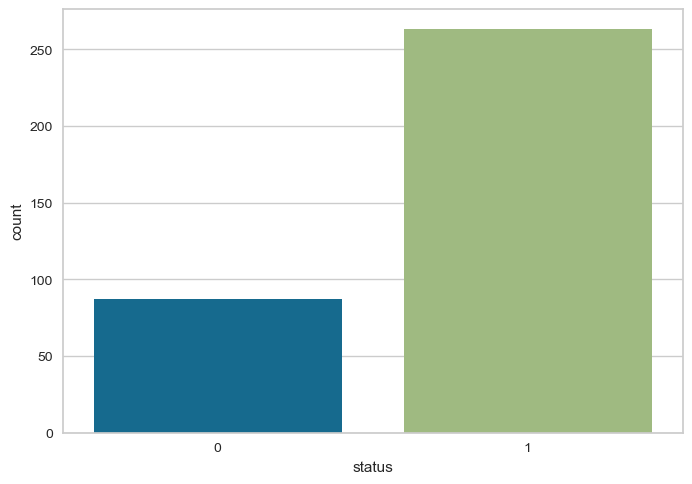

In [5]:
ax = sns.countplot(x="status", data=df)

### Split training & test dataset

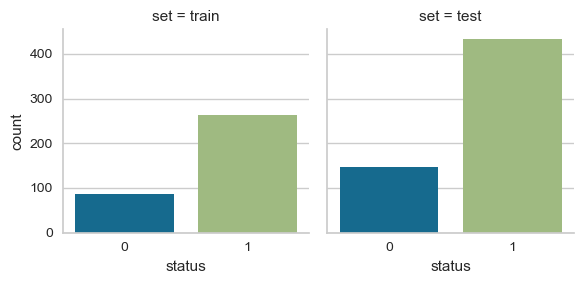

Training dataset           : 350
Unseen data for validation : 581


In [6]:
test_df = pd.read_csv("small_parkinsons_Istanbul_data.csv")
train_df = df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

test_df['set'] = 'test'
train_df['set'] = 'train'

ax = sns.catplot(x="status", col="set", data=pd.concat([train_df, test_df]), kind="count", height=3)
plt.show()

print('Training dataset           :', len(train_df))
print('Unseen data for validation :', len(test_df))

### Setup environment

In [7]:
clf1 = setup(data = train_df, target = 'status',ignore_features = ['name'], fix_imbalance=True, session_id=123, remove_outliers = True)




,Description,Value
0,Session id,123
1,Target,status
2,Target type,Binary
3,Original data shape,"(350, 8)"
4,Transformed data shape,"(450, 8)"
5,Transformed train set shape,"(344, 8)"
6,Transformed test set shape,"(106, 8)"
7,Ignore features,1
8,Numeric features,6
9,Categorical features,1


### Model selection

In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7915,0.7784,0.8658,0.8660,0.8624,0.4129,0.4247,0.6220
lightgbm,Light Gradient Boosting Machine,0.7832,0.8049,0.8450,0.8734,0.8563,0.4013,0.4131,0.5660
rf,Random Forest Classifier,0.7587,0.7871,0.8289,0.8563,0.8396,0.3394,0.3470,0.5730
gbc,Gradient Boosting Classifier,0.7583,0.7920,0.8345,0.8517,0.8404,0.3311,0.3393,0.4910
dt,Decision Tree Classifier,0.7335,0.6393,0.8120,0.8341,0.8204,0.2795,0.2838,0.3290
ada,Ada Boost Classifier,0.7015,0.6915,0.7599,0.8353,0.7935,0.2508,0.2582,0.4670
knn,K Neighbors Classifier,0.6855,0.6998,0.7178,0.8568,0.7756,0.2484,0.2686,0.3040
lda,Linear Discriminant Analysis,0.6853,0.7780,0.6912,0.8740,0.7696,0.2899,0.3124,0.3620
ridge,Ridge Classifier,0.6682,0.0000,0.6702,0.8721,0.7521,0.2698,0.2947,0.3220
lr,Logistic Regression,0.6647,0.7403,0.6599,0.8769,0.7465,0.2723,0.2986,0.9380


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

### Create Extra Trees Classifier Model

In [8]:
extraTreesClassifier = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.7193,0.8947,0.8947,0.8947,0.5614,0.5614
1,0.8000,0.8816,0.8421,0.8889,0.8649,0.4813,0.4839
2,0.6800,0.6798,0.7895,0.7895,0.7895,0.1228,0.1228
3,0.8000,0.8254,1.0000,0.7826,0.8780,0.3655,0.4729
4,0.9167,1.0000,0.8889,1.0000,0.9412,0.8000,0.8165
5,0.7917,0.8102,0.8333,0.8824,0.8571,0.4737,0.4763
6,0.7917,0.8935,0.8333,0.8824,0.8571,0.4737,0.4763
7,0.9583,0.9630,1.0000,0.9474,0.9730,0.8824,0.8885
8,0.7917,0.8657,0.7778,0.9333,0.8485,0.5238,0.5466


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tuned Model

In [9]:
tuned_extraTreesClassifier = tune_model(extraTreesClassifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6800,0.7193,0.6842,0.8667,0.7647,0.2857,0.3059
1,0.7200,0.8333,0.6842,0.9286,0.7879,0.4027,0.4453
2,0.6000,0.6842,0.6316,0.8000,0.7059,0.1071,0.1147
3,0.7200,0.7063,0.8889,0.7619,0.8205,0.2009,0.2138
4,0.8333,0.9444,0.7778,1.0000,0.8750,0.6364,0.6831
5,0.7917,0.7593,0.8889,0.8421,0.8649,0.4118,0.4146
6,0.8750,0.9167,0.8333,1.0000,0.9091,0.7143,0.7454
7,0.8750,0.9815,0.8333,1.0000,0.9091,0.7143,0.7454
8,0.7500,0.8241,0.7222,0.9286,0.8125,0.4545,0.4880


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Evaluate training performance

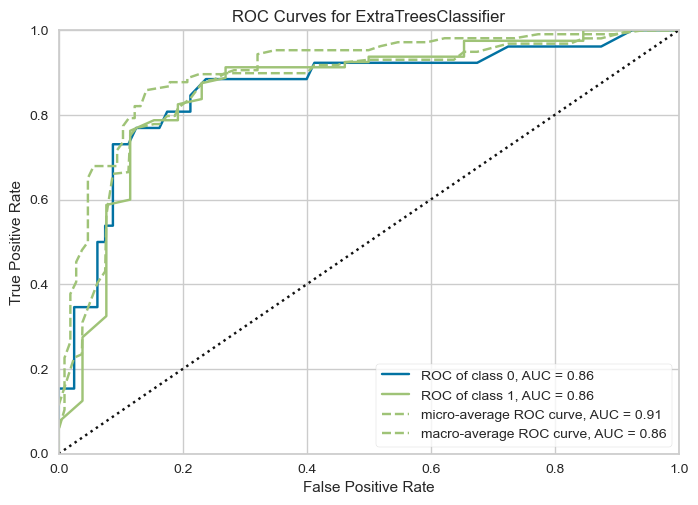

In [10]:
plot_model(tuned_extraTreesClassifier, plot = 'auc')

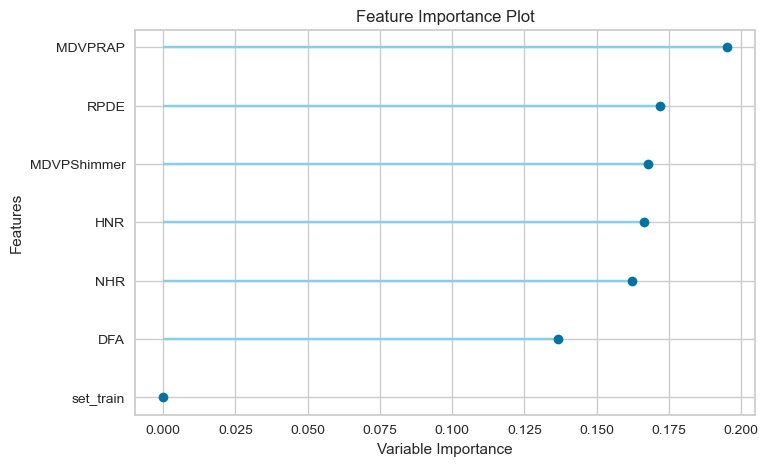

In [11]:
plot_model(tuned_extraTreesClassifier, plot='feature')

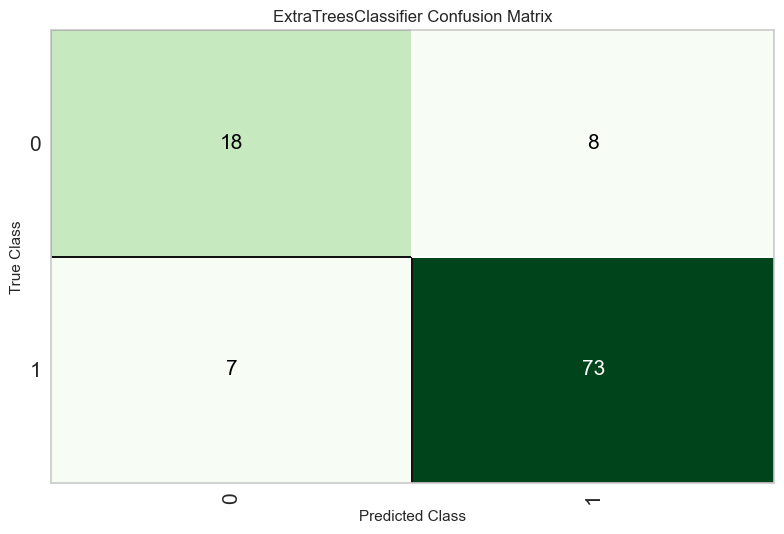

In [12]:
plot_model(tuned_extraTreesClassifier, plot = 'confusion_matrix')

### Evaluate on unseen data

In [13]:
final_extraTreesClassifier = finalize_model(tuned_extraTreesClassifier)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7229,0.6560,0.8522,0.7918,0.8209,0.2124,0.2152


              precision    recall  f1-score   support

   parkinson       0.44      0.34      0.39       148
      normal       0.79      0.85      0.82       433

    accuracy                           0.72       581
   macro avg       0.62      0.60      0.60       581
weighted avg       0.70      0.72      0.71       581



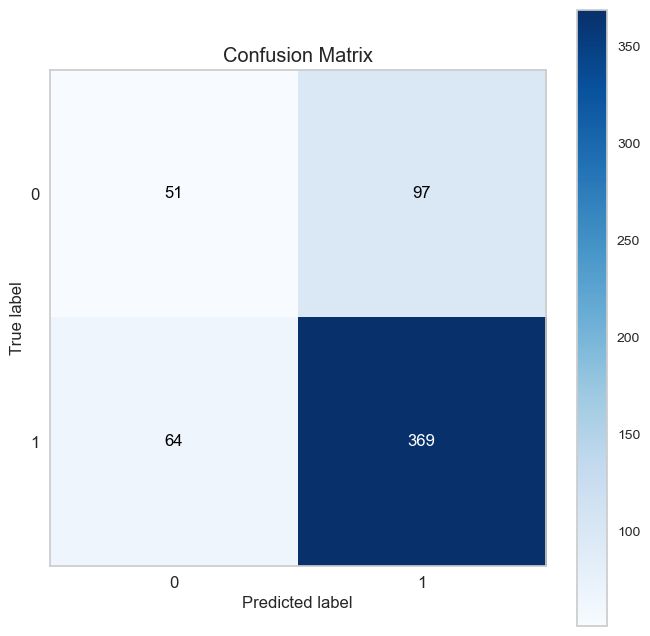

In [14]:
unseen_predictions = predict_model(final_extraTreesClassifier, data=test_df)
class_names=['parkinson', 'normal']
print(classification_report(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, target_names=class_names,zero_division=0))
cm = skplt.metrics.plot_confusion_matrix(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, figsize=(8, 8), normalize=False)


